# Palmer Penguin Species Data Set



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.impute import SimpleImputer
from sklearn.gaussian_process.kernels import RBF

In [ ]:
# dataset directory https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data

penguin_src = '/content/penguins_size.csv'

In [ ]:
# upload as dataframe

penguin_df = pd.read_csv(penguin_src)
penguin_df = penguin_df.drop(columns=['island','sex'])
display(penguin_df)

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
3,Adelie,NaN,NaN,NaN,NaN
4,Adelie,36.7,19.3,193.0,3450.0
...,...,...,...,...,...
339,Gentoo,NaN,NaN,NaN,NaN
340,Gentoo,46.8,14.3,215.0,4850.0
341,Gentoo,50.4,15.7,222.0,5750.0
342,Gentoo,45.2,14.8,212.0,5200.0


In [ ]:
# determine NaN cells

penguin_df.isna().sum()

,0
species,0
culmen_length_mm,2
culmen_depth_mm,2
flipper_length_mm,2
body_mass_g,2


In [ ]:
# impute NaN cells

imputer = SimpleImputer(strategy='mean')
numerical = imputer.fit_transform(penguin_df[['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']])
penguin_df[['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']] = numerical
display(penguin_df)

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.10000,18.70000,181.000000,3750.000000
1,Adelie,39.50000,17.40000,186.000000,3800.000000
2,Adelie,40.30000,18.00000,195.000000,3250.000000
3,Adelie,43.92193,17.15117,200.915205,4201.754386
4,Adelie,36.70000,19.30000,193.000000,3450.000000
...,...,...,...,...,...
339,Gentoo,43.92193,17.15117,200.915205,4201.754386
340,Gentoo,46.80000,14.30000,215.000000,4850.000000
341,Gentoo,50.40000,15.70000,222.000000,5750.000000
342,Gentoo,45.20000,14.80000,212.000000,5200.000000


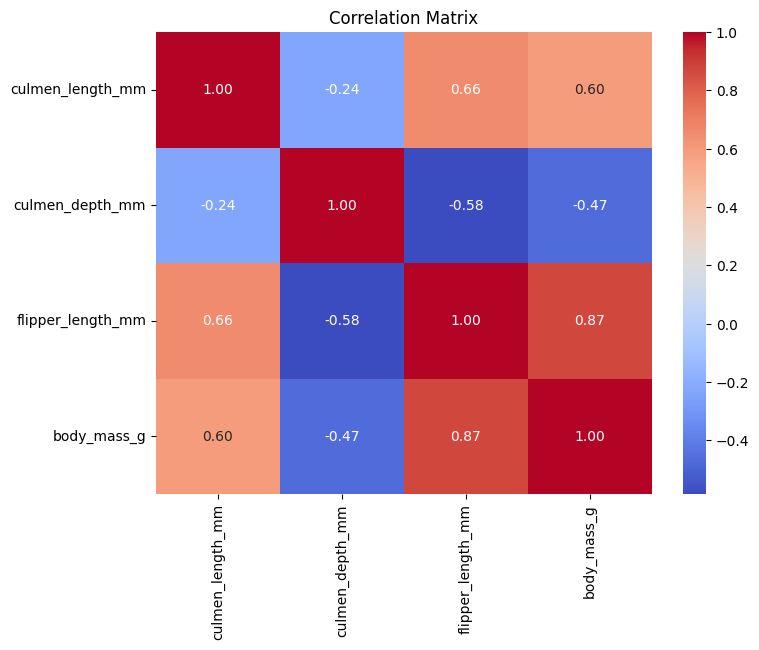

In [ ]:
# features correlation matrix

correlation_matrix = penguin_df.drop('species', axis=1).corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

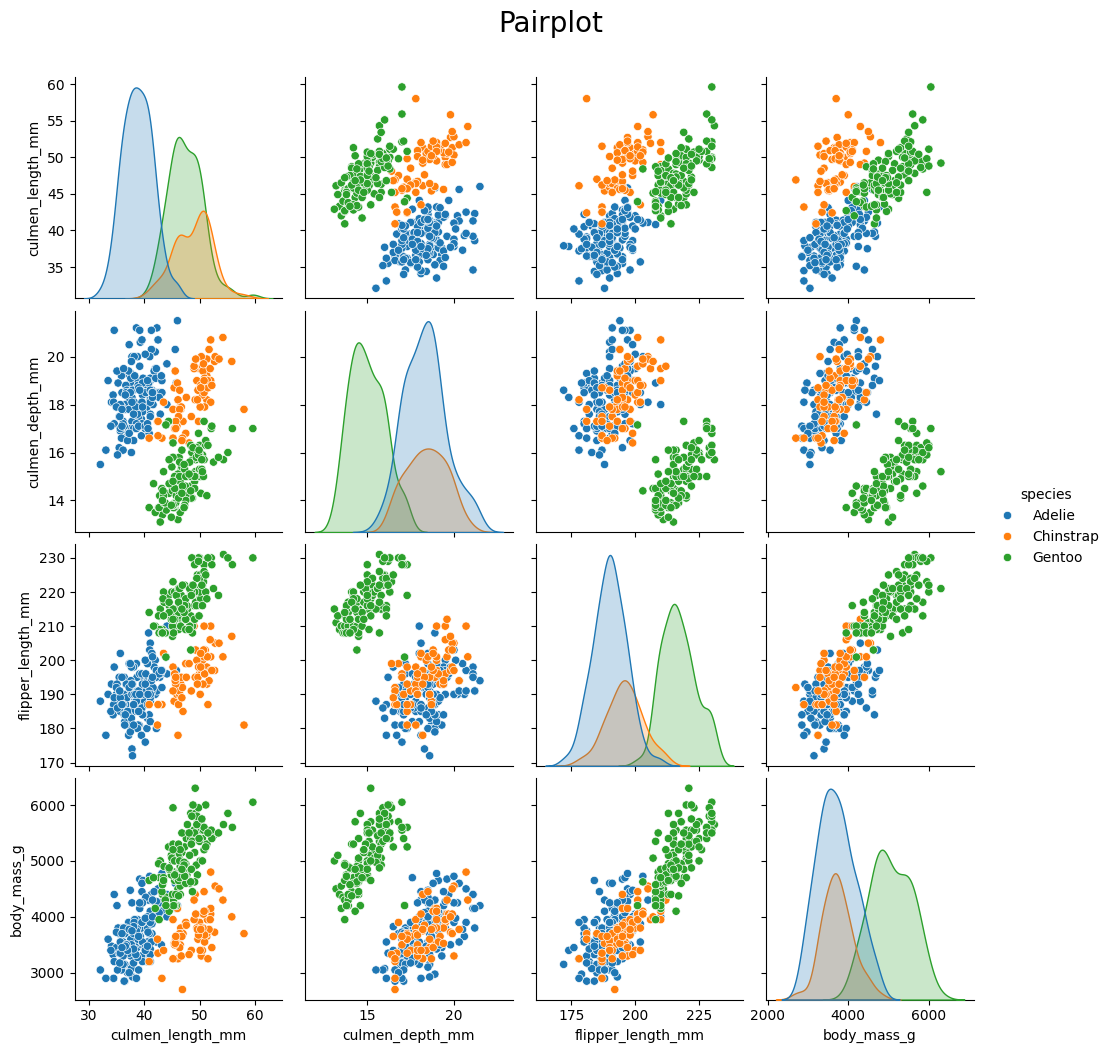

In [ ]:
# features pairplot

g = sns.pairplot(penguin_df, hue='species')
g.fig.suptitle('Pairplot', y=1.05, fontsize=20)
plt.show()

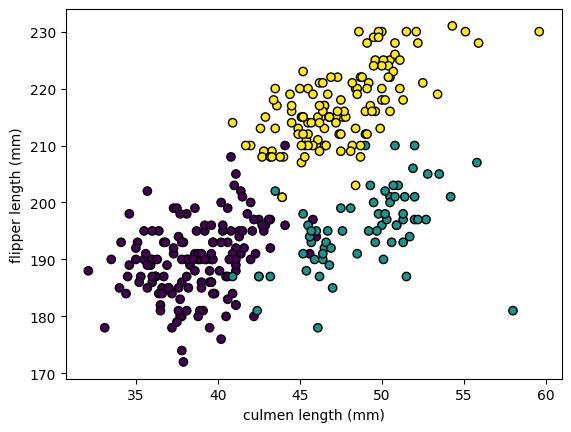

In [ ]:
# dataset scatterplot (limited to culmen length and flipper length)

index, unique_species = pd.factorize(penguin_df['species'])

plt.scatter(penguin_df['culmen_length_mm'], penguin_df['flipper_length_mm'], c=index, edgecolors='k')
plt.xlabel('culmen length (mm)')
plt.ylabel('flipper length (mm)')
plt.show()

In [ ]:
# train-test split 75/25

x = penguin_df.drop(columns=['species','culmen_depth_mm','body_mass_g']) # subset to culmen length and flipper length
y = penguin_df['species']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0, stratify=y)

In [ ]:
# multiclass SVM pipeline (One V One Classifier), train-test metrics

svm_ovo = OneVsOneClassifier(make_pipeline(StandardScaler(),
                                           SVC(kernel='rbf', gamma='scale'))).fit(X_train,y_train)

print(f"OVO Training Accuracy: {round(svm_ovo.score(X_train, y_train),4)}")
print('Confusion Matrix (Train)')
print(confusion_matrix(y_train, svm_ovo.predict(X_train)))
print('Classification Report (Train)')
print(classification_report(y_train, svm_ovo.predict(X_train)))

print(f"OVO Testing Accuracy: {round(svm_ovo.score(X_test, y_test),4)}")
print('Confusion Matrix (Test)')
print(confusion_matrix(y_test, svm_ovo.predict(X_test)))
print('Classification Report (Test)')
print(classification_report(y_test, svm_ovo.predict(X_test)))

OVO Training Accuracy: 0.9574
Confusion Matrix (Train)
[[110   2   2]
 [  4  44   3]
 [  0   0  93]]
Classification Report (Train)
              precision    recall  f1-score   support

      Adelie       0.96      0.96      0.96       114
   Chinstrap       0.96      0.86      0.91        51
      Gentoo       0.95      1.00      0.97        93

    accuracy                           0.96       258
   macro avg       0.96      0.94      0.95       258
weighted avg       0.96      0.96      0.96       258

OVO Testing Accuracy: 0.9535
Confusion Matrix (Test)
[[37  1  0]
 [ 1 16  0]
 [ 1  1 29]]
Classification Report (Test)
              precision    recall  f1-score   support

      Adelie       0.95      0.97      0.96        38
   Chinstrap       0.89      0.94      0.91        17
      Gentoo       1.00      0.94      0.97        31

    accuracy                           0.95        86
   macro avg       0.95      0.95      0.95        86
weighted avg       0.96      0.95      0.95

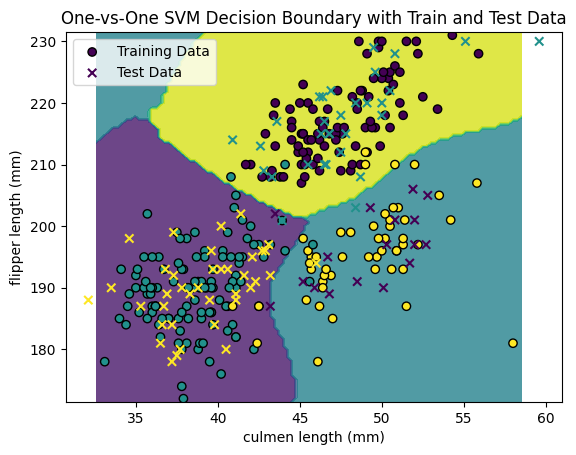

In [ ]:
# decision boundary of train-test data

DecisionBoundaryDisplay.from_estimator(svm_ovo, X_train, alpha=0.8, eps=0.5)

y_train_index, y_train_species = pd.factorize(y_train)
plt.scatter(X_train['culmen_length_mm'], X_train['flipper_length_mm'], c=y_train_index, edgecolors="k", label='Training Data', marker='o')

y_test_index, y_test_species = pd.factorize(y_test)
plt.scatter(X_test['culmen_length_mm'], X_test['flipper_length_mm'], c=y_test_index, label='Test Data', marker='x')

plt.xlabel('culmen length (mm)')
plt.ylabel('flipper length (mm)')
plt.title('One-vs-One SVM Decision Boundary with Train and Test Data')
plt.legend()
plt.show()

In [ ]:
# multiclass SVM pipeline (One V Rest Classifier), train-test metrics

svm_ovr = OneVsRestClassifier(make_pipeline(StandardScaler(),
                                           SVC(kernel='rbf', gamma='auto'))).fit(X_train,y_train)

print(f"OVR Training Accuracy: {round(svm_ovr.score(X_train, y_train),4)}")
print('Confusion Matrix (Train)')
print(confusion_matrix(y_train, svm_ovr.predict(X_train)))
print('Classification Report (Train)')
print(classification_report(y_train, svm_ovr.predict(X_train)))

print(f"OVR Testing Accuracy: {round(svm_ovr.score(X_test, y_test),4)}")
print('Confusion Matrix (Test)')
print(confusion_matrix(y_test, svm_ovr.predict(X_test)))
print('Classification Report (Test)')
print(classification_report(y_test, svm_ovr.predict(X_test)))

OVR Training Accuracy: 0.9612
Confusion Matrix (Train)
[[111   2   1]
 [  4  44   3]
 [  0   0  93]]
Classification Report (Train)
              precision    recall  f1-score   support

      Adelie       0.97      0.97      0.97       114
   Chinstrap       0.96      0.86      0.91        51
      Gentoo       0.96      1.00      0.98        93

    accuracy                           0.96       258
   macro avg       0.96      0.95      0.95       258
weighted avg       0.96      0.96      0.96       258

OVR Testing Accuracy: 0.9419
Confusion Matrix (Test)
[[37  1  0]
 [ 2 15  0]
 [ 1  1 29]]
Classification Report (Test)
              precision    recall  f1-score   support

      Adelie       0.93      0.97      0.95        38
   Chinstrap       0.88      0.88      0.88        17
      Gentoo       1.00      0.94      0.97        31

    accuracy                           0.94        86
   macro avg       0.94      0.93      0.93        86
weighted avg       0.94      0.94      0.94

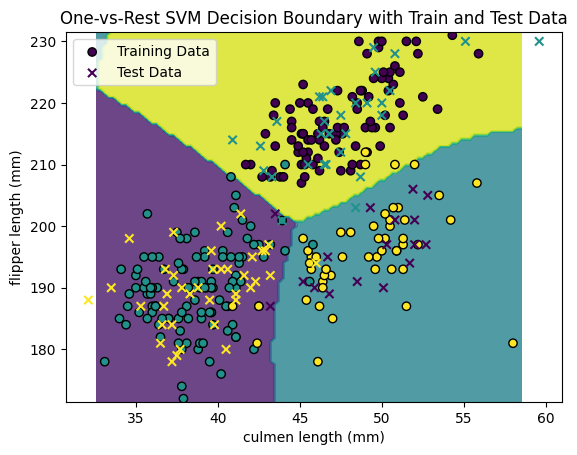

In [ ]:
# decision boundary of train-test data

DecisionBoundaryDisplay.from_estimator(svm_ovr, X_train, alpha=0.8, eps=0.5)

y_train_index, y_train_species = pd.factorize(y_train)
plt.scatter(X_train['culmen_length_mm'], X_train['flipper_length_mm'], c=y_train_index, edgecolors="k", label='Training Data', marker='o')

y_test_index, y_test_species = pd.factorize(y_test)
plt.scatter(X_test['culmen_length_mm'], X_test['flipper_length_mm'], c=y_test_index, label='Test Data', marker='x')

plt.xlabel('culmen length (mm)')
plt.ylabel('flipper length (mm)')
plt.title('One-vs-Rest SVM Decision Boundary with Train and Test Data')
plt.legend()
plt.show()